# Loading the PSL indices, and comparing them against package calculated anomalies

## Load Libraries

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import matplotlib.pyplot as plt
from src.comp_seq import comp_seq
from src.visualisation.pairplot import pairplot
from src.data_loading.psl import get_psl_indices, get_ersstv5
from src.xr_utils import can_coords, fix_calendar, sel
from src.metrics import nino_calculate
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=200)

## Download PSL indices

In [3]:
# Dowload the PSL indices from the website
psl_ds = get_psl_indices()
psl_df = psl_ds.to_dataframe()

## Inspect PSL indices

In [4]:
# Download the PSL indices
psl_ds

<xarray.Dataset>
Dimensions:  (time: 888)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-15 1948-02-15 ... 2021-12-15
Data variables:
    nino1+2  (time) float32 nan nan nan nan nan nan ... -0.3 -0.67 -0.79 nan nan
    nino3    (time) float32 nan nan nan nan nan ... -0.46 -0.44 -0.75 nan nan
    nino3.4  (time) float32 nan nan nan nan nan ... -0.51 -0.56 -0.95 nan nan
    nino4    (time) float32 nan nan nan nan nan ... -0.26 -0.53 -0.73 nan nan
    oni      (time) float32 nan nan nan nan nan nan ... -0.48 -0.67 nan nan nan
    tni      (time) float32 0.454 0.047 -0.135 -0.469 -0.95 ... nan nan nan nan
    soi      (time) float32 nan nan nan nan nan nan ... 2.3 1.0 1.3 1.2 nan nan
    meiv2    (time) float32 nan nan nan nan nan ... -1.34 -1.41 -1.47 nan nan
    best     (time) float32 0.26 0.43 0.72 0.21 0.24 ... -0.7 -1.04 nan nan
    hurr     (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan nan
    prcp     (time) float32 nan nan nan nan nan ... -1.254 -0.5527 nan nan
    pacwarm  (time) float32 -0.622 -0.549 -0.716 -0.609 ... 0.401 0.449 nan nan

/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


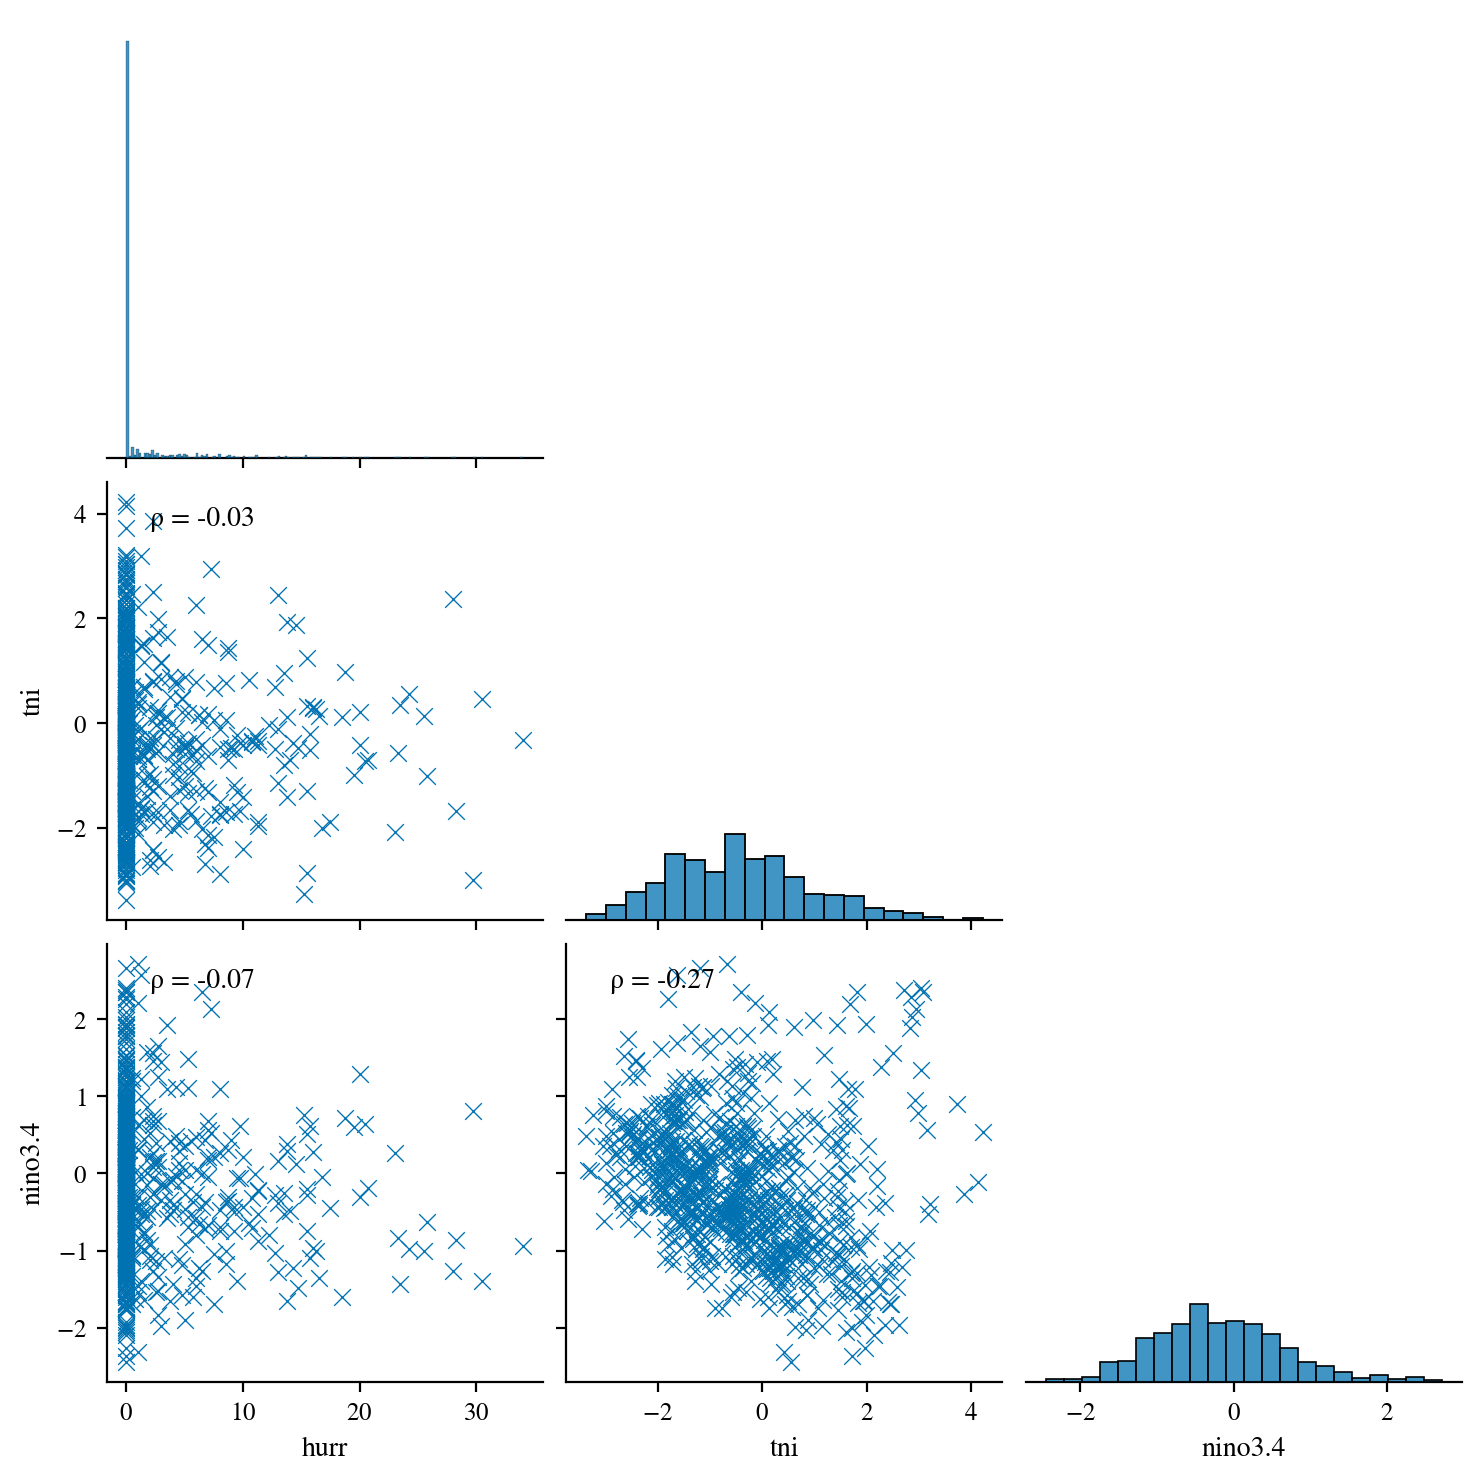

In [5]:
pairplot(psl_df[["hurr", "tni", "nino3.4"]])

/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/users/sithom/seager19/env/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


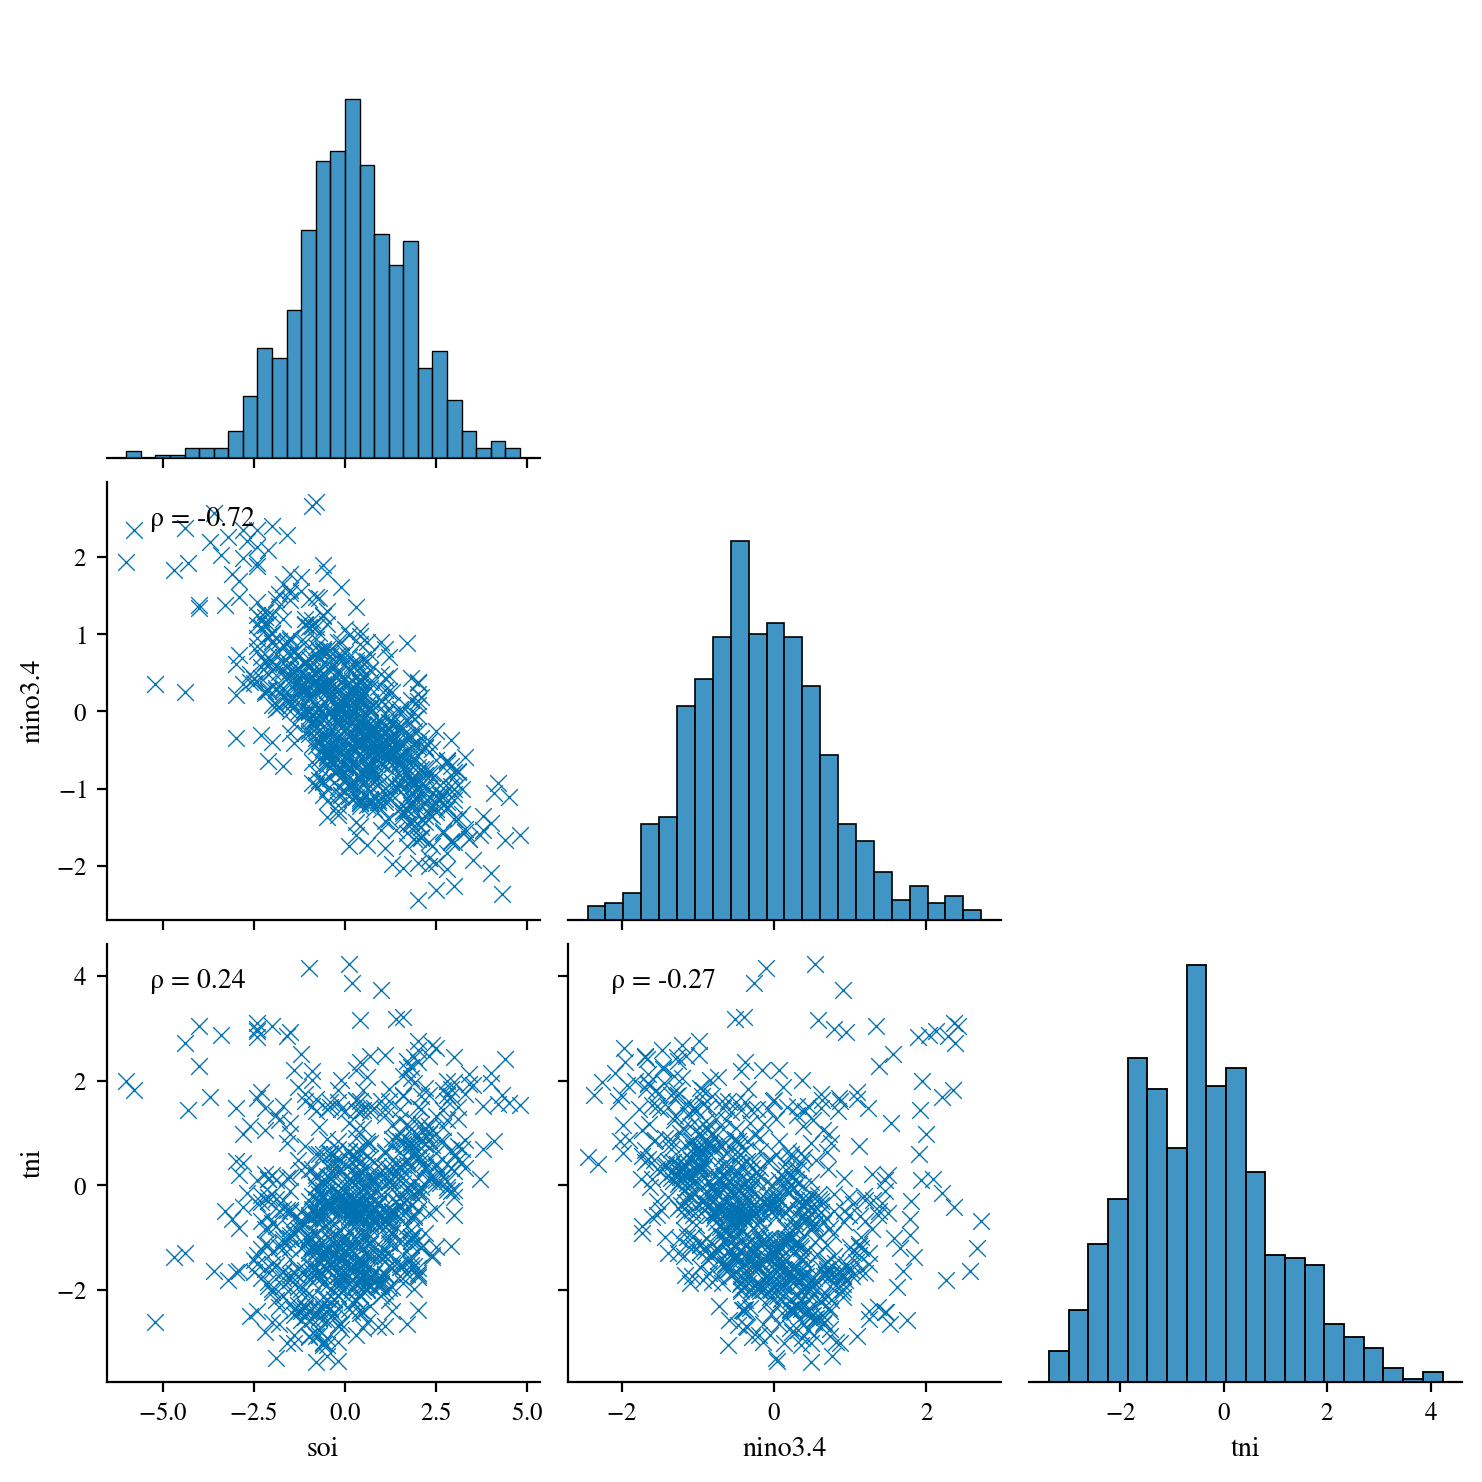

In [6]:
pairplot(psl_df[["soi", "nino3.4", "tni"]])

## Download ERSSTV5

In [7]:
# Dowload ERSSTV5 reanalysis product from which psl sea surface indices are calculated
ersstv5 = get_ersstv5()
ersstv5_slim = ersstv5.sel(time=slice("1948", "2021"))
ersstv5_can = fix_calendar(can_coords(ersstv5_slim)).isel(variable=0)

## Compare PSL indices against our index calculations



===== nino3.4 =====
correlation matrix [[1.0 0.998794655697617]
 [0.998794655697617 1.0]]
slope: 0.9953671071300163
intercept: 0.20171243976213266
r_value: 0.9987946556976167
p_value: 0.0
std_err: 0.0016680055790584797





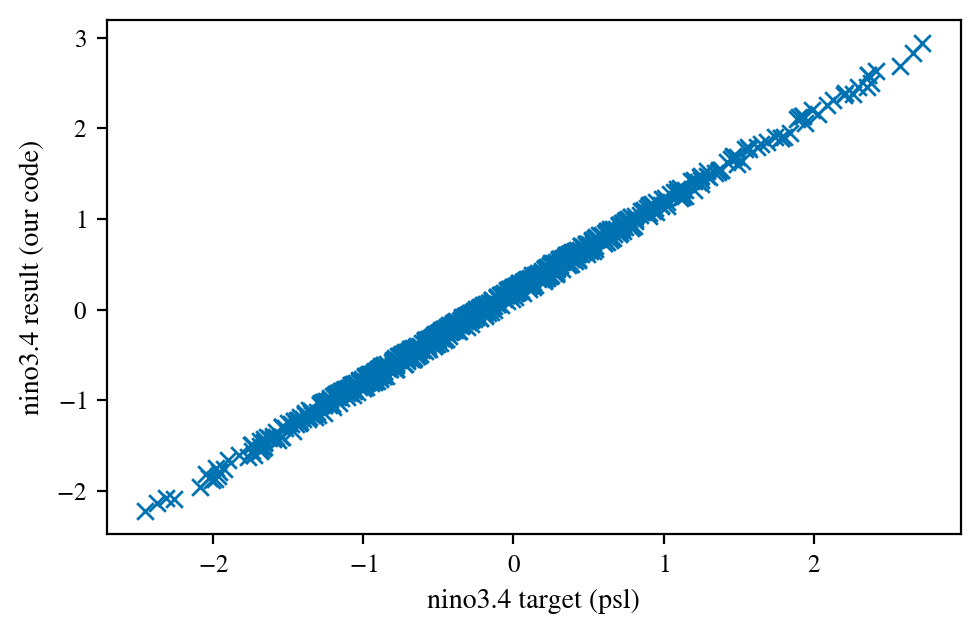



===== nino3 =====
correlation matrix [[1.0 0.9983586329289734]
 [0.9983586329289734 1.0]]
slope: 0.995138089242093
intercept: 0.24110258121849562
r_value: 0.998358632928974
p_value: 0.0
std_err: 0.0019466466185894748





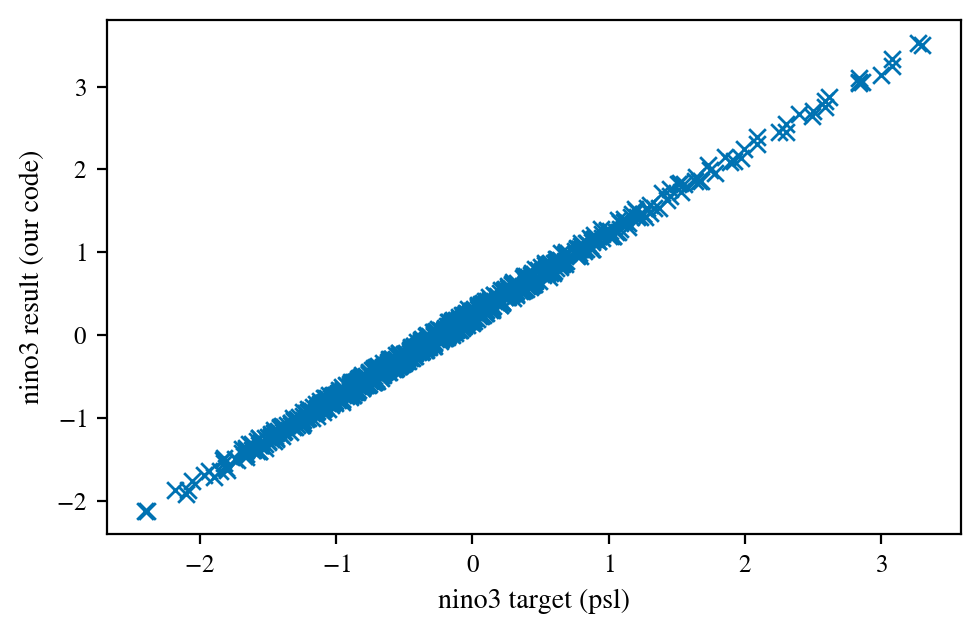



===== nino4 =====
correlation matrix [[1.0 0.9984668609648092]
 [0.9984668609648092 1.0]]
slope: 0.9877885417259548
intercept: 0.2758879118231335
r_value: 0.998466860964809
p_value: 0.0
std_err: 0.00186732688227996





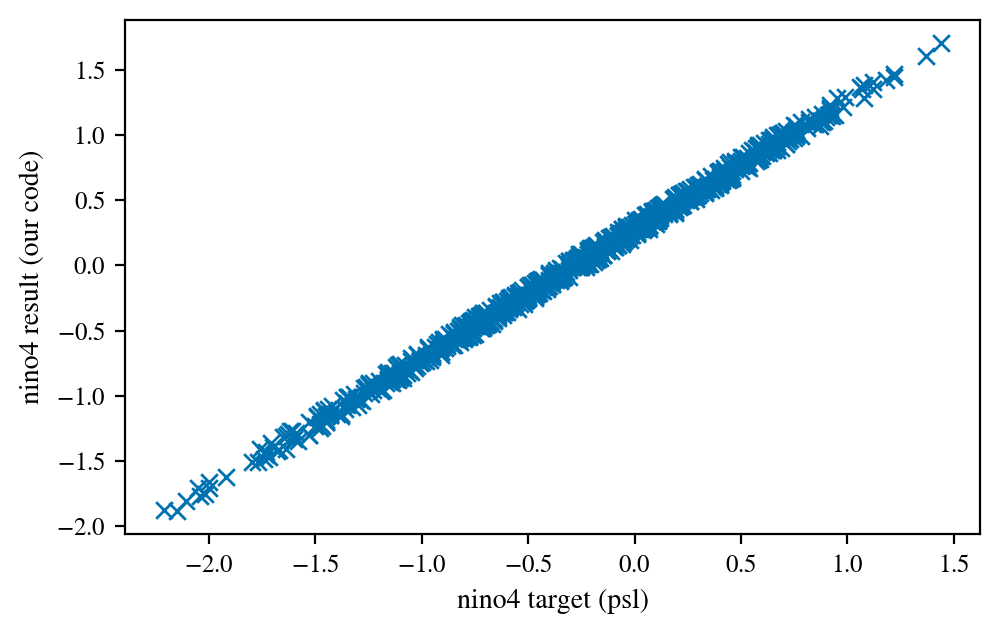



===== nino1+2 =====
correlation matrix [[1.0 0.9992073362076906]
 [0.9992073362076906 1.0]]
slope: 0.9648830615246707
intercept: 0.2757369748548087
r_value: 0.9992073362076904
p_value: 0.0
std_err: 0.0013108206415181742





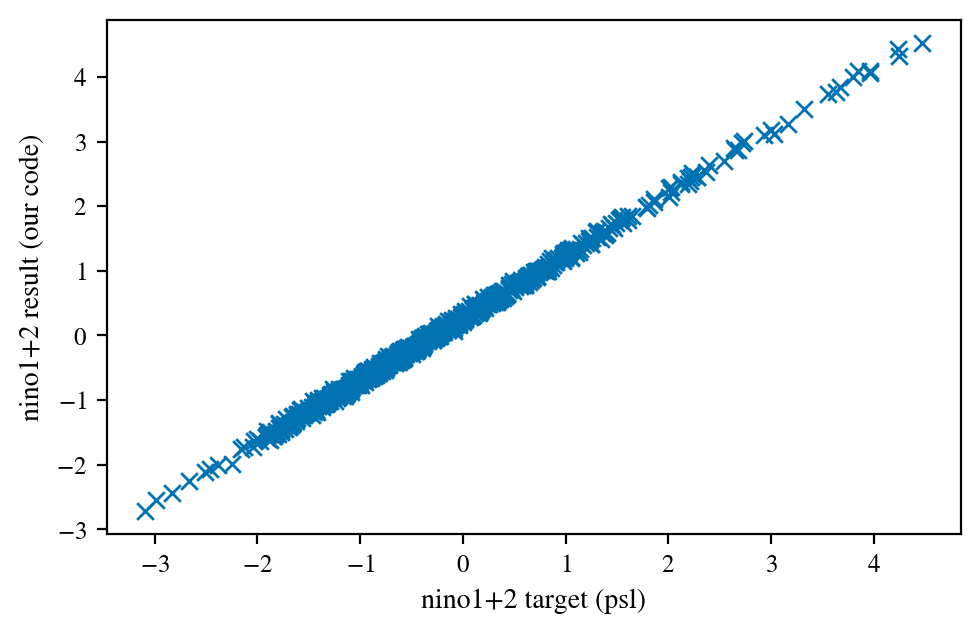

In [9]:
for i in [
    "nino3.4",
    "nino3",
    "nino4",
    "nino1+2",
]:
    my_nino_da, climatology_da = nino_calculate(ersstv5_can, reg=i, roll_period=1)
    my_nino = my_nino_da.values
    psl_nino = psl_ds[i].sel(time=slice("1948", "2021-10")).values
    comp_seq(i, psl_nino, my_nino)